# Emojis Visualizations - Fake Covid-19 dataset

We've used the following packages:

In [ ]:
import pandas as pd
import numpy as np
import json
import itertools  
from collections import Counter
import altair as alt
import demoji
import csv

#demoji.download_codes()

To read the JSON file that has all the tweets and to read the CSV to do the classification later, it is necessary to do:

In [ ]:
csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We're interested in the "full_text" field and "id_str" (for the tweets classification):

In [ ]:
index= 0
emos = []
for element in data:
    token_id = data[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    em = demoji.findall_list(data[index]['full_text'], False)
    if em:
        for e in em: 
            final_token = e + " " + lista_unica_csv[indice_csv+1].lower().replace(" ", "")
            emos.append(final_token)
    index= index+1
   
    

We have calculated the frequency distribution and worked on the dataframe to display the correct data:

In [ ]:
#merged=list(itertools.chain.from_iterable(emos))
#print(merged)
#print(emos)
c = Counter(emos)


df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Emojis', 0:'count'})
col_one_list = df['Emojis'].tolist()
col_two_list = df['count'].tolist()

typelist=[]
namelist=[]

index = 0

count_false = [0] * len(col_one_list)
count_part = [0] * len(col_one_list)

for el in col_one_list:
    tok = el.split()
    namelist.append(tok[0])
    if tok[0] in namelist:
        indx = namelist.index(tok[0])
        if tok[1] == "false":
            count_false[indx] = col_two_list[index]
        elif tok[1] == "partiallyfalse":
            count_part[indx] = col_two_list[index]
        else:
            print("errore count")
   
    index = index + 1
    


df['Emojis']=namelist
df['False']=count_false
df['Partially False']=count_part
del df['count'] #clean column
df['count'] = df['False'] + df['Partially False']


#print(df.to_string())

Here it is the final result, the chart displays only the emoji appeared in at least five different tweets:
We have used Vega to plot this chart and not Altair, to get the data in a good looking way (already indented) and ready for the Vega Editor we have used Altair to get them. (Plot the chart => view source => clean the source and copy paste on Vega).
**We know this isn't the most efficient solution, let us know if you have other ideas**

In [ ]:
bars = alt.Chart(df).transform_fold(
    ['False', 'Partially False'],
).mark_bar().encode(
    x=alt.X('key:N',title=None), # axis=alt.Axis(labels=False)
    y=alt.Y('value:Q',title='Tweet count'),
    color=alt.Color('key:N',scale=alt.Scale(range=['#5D3A9B','#E66100']),title="Category"),
    column=alt.Column("Emojis:N"),
    tooltip=[
        alt.Tooltip('key:N', title='Tweet Type'),
        alt.Tooltip('Emojis:N', title='Emoji'),
        alt.Tooltip('value:Q', title='Tweet count')
    ]
).transform_filter(
    alt.FieldRangePredicate(field='count', range=[7, 26])
).properties(
    title="The most frequent emojis in tweets classified by category (False, Partually False)",
    width=75
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
    #orient="left"
).configure_header(
    titleFontSize=16,
    labelFontSize=14
)

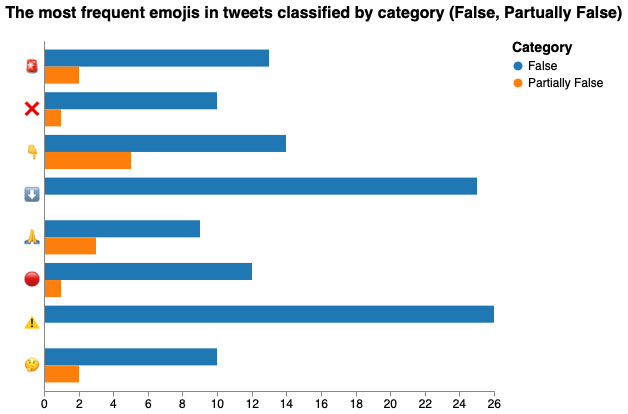

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AFXgACBGwiYdAM0VwAjgzjijiNsJoQdNcTswB3OHExOoAGyQICBpjGjhZHSYATx0oJExyNkUYgAoAMSQ-CDgpHQAFJEVMBky-GIysuABKaRB3Gll6NAAWAQAGGXgaMiw0AGZ2mRwkWVkXMjQBGTVMPzg0UASAD0w0EG04PQMjUwsrGx07BycXN09vXwCgkLCI6Nj4xOSddMzs3IKikr8ynQrsmoyYwSTAAZRoAC95qgAIwANhkbGMxmyq1QACY2gBfGSyeIoVAAbVA4iQCGhIEwSCYc1qxEyVggaGJIAAovpjmtALwbgAq92r-aEwvoyT5qUrlN7Q9EyKBsBg2NAwgQ40Ds+yONaAHg3AJe7msAV7v8yWKkWFMU-CWVNAdECy+VomEqtkcjXoHWawD-u4bLahmiaijRxX8jahrbaFT7HWrOehACbkgHg-r3Zfp+s2-AVoaU2uXh5VSVXOpnoLmAQL3E4KUwHzUHvaHs-bIwWtYBR-bLxpAosraeDtbtiob6sLIE1gDT9hMydOwiuBic98MOvNOgdrQAy5K3YdaO9PgzCZXXFfP80ui4BxHbXMN97dNnYtSdQUyzvdhAE5+9GQIAUcjHIAn983VZnu6Prmh5voAqtRrpmf5djWgHhuir4ukOgDnu5qgB3u2eU7-t2sH1guUaIVygCSO5qgB-+xhl7+luMEPnOCGDlygBAe2uCIUamN7QrOaJwnRayAODUX4Tuiv5XlRt6cRmwGLm+XKAPU7a7Cqx17VmJOH9DxRaAOx7a4XlB7FWqpEZ4Y2RaADJ7mqAD-75G6cpHEGQeUmIZqgBfu5qgAfu2uADsmHQbemZhmiL5GUeIBcsemqAN-7EHeXpk40WifTqSFgDLu2uG4iVh3o7nFfZBdJgBHO550U2fp2WoB5iWhZqgC-+9pRUTll-mTBVYWReO2GKaJtmldiuWOShBptd6kHpT5XWNRiFWAKy7VkjTF4mwhVhFrk+dXteNgUgQRfKDSpHUZbt409Ztg6aoAF7uaoAL7szZR+1jXuC29SdgCvu5qgB-u9dbHFSGdmJZqKGAJ+7H1KQBpX2fhJ16m5a7CTdo0leNkng1qqGaoDO3Qgp1kTgp43cY9Wr-ZqgDfu0DnXw-dYPGUOROaoAz7uk7d5OPpTwX6s5DNw99oMVYAXzvyatmUGc0FWAN07-N7Zz80JfjRaAN87UUS3NBnwTLICAHwbgDouxzSvc6rgCchNrX0NfdKvHdygDye8tAu3jjFOmw5J0ue56MlVja33UdDtrGrgAFu+LbvUeN0tm0WgBQuwrAe3sbj7B17RaAOc7EezV98320jJ6pdbd2Pp76chYADzv+8nINB4lgCF5AJwZeYrKcGeVqtcoAnztF7DOul6rgCslIbJcU79gDb+5Xgs1z3zO-YA17uaoA77vd+7o+q5qgA3u39M+B738+T+zLuxZH2e0Q3gAsu2ew2t0bdmx3nZ109DWdtrjiWAAVkg++SxO9M3BeMhyA8aZ8Ps-hrnVM0Kox-q-Lmh1EqAFByK2v8h7jRhAA4KgAFahbp9Ee4Zz5Uy5IAAR2UHAz-vFRKgBcMlwWTMB90MHBTLiQxmsVxrC1VvfNcAAOG+ZDHxMMSoAFbJaowIOvdehn81aABRds8aUT6CTsmnKmgBU8iTuI-BGZEoGy3mI1BCiQyJUAFDk1UV58Lnp-IiOit7HzUavR8UjgpckALR71DJYGQoW+NWgAF3ZAcXbcP1VbCNcfIsx-9EqAAfiORpio72IqoAMl3dG71wp-QAkgRP3LLwqJOUDGABmdoJeDfFogsW+QA6uQ8NAfNARccQqAAUd9JpDU4VUACI75SaGVPnudemKjWHzQQW+TUL1AAPu5Et+0TimakAJn78S2wFI8QYwARHs9LYXvT+gA20mGdvNx3p7x3wboALL2pnzRZtJQAFTubLGcUrkgALHdqXY0q2TEKAFSyBZJiMl6Lgr9QAsPtTL8uQxKatADku944JCS4G-UAKf73y7m-LXp-DuCysqjN1p-Oml19nQsOYAY92IUtIOXnQADAw3NReciqgBS3ZRYk3pyTDmABMd+Ffz9ZYsJdMrJFVADAe+S0Fhy+bNOpa08uQKKkGTaQRQAsjuMv0YcwA7zsCpmYcwA1Xu2Lbm8hugAyHdFX0vOXJAApO6c6V5j3mAGddtVtccXz0AJH7Oq0G0oboAeD2FXEqVYANx2LUPRhZDU6Rr1EXPooAGp3OU0OjmKpV4dWVQvAareZHqzkBoMYAYR3bXbIIoiyN7zAAruxFWNDdAASe0mgxgApPbTYcwAkntZqVYAeR2LJ5qpmrQANLtSt1e3AxgBHneLZYwAVTtOu9LbICFVADSe02+5JqDGAGkdztSSJrzxegNb87i2VosAYAe3261vkAMRkBL-VMovijaeW9IVLK7ZaktgBy3ZnY5FGTTR1D0XYKpVgAoPf7USwdBjACEe-kjdA6ilKsAAR7e6TqAAP9t93JACAu1+os5tE1ruxRSgxgAPnb-SAVcfqH1Xp5YOKB0GfGbo0Q3QAsHtTK9d2-pgAV-Yg1yQAIzt4fzcGmKLFVkGLCpZID46EVKsAPk7JGvqvI1Q3RtiGfmwYqoAWr3GP1QnazQAhPsLpgzSrdljAAyOxB2ZFbjVqQbrywDR6Qk0ZA-086TlL2ievYcwAqTsQbVoAQl28OACo9zT9TBGABJdvDgAcPbM8rCqgA4PYg0A7UMn1EOIIpbdjwLOMN0AGk7vGx2qbzgAOsC7ApdJbADGu+F5TwXAGADb9uzeqDGFpqlvGGHGtOI0AYAOH3YsY1CfPZ53muXdQqj2zUgB--eS+NF13tAB4uxB9EgBjggw-Z1WcI2vUZPd6zBh9St1O5e8wAtLsFdvpFyxgBuXbw4AGV28MiJ6yJrZFV62KZBqAzDYn2mAGn99b7VNv8ekoARh28OADYdiDfRutKalMBk2FVACcu25zJcmDGAHMdvDVqjE3ZGcto7jlaaL2c65K+S2kMDqjRDIHYOssrfnoTQ9fGVOTfaYAJ93NSADPdvDgBBHeE+Dq9kPvaABPdiDgABMjx7D-79FACHO-piJxi7ssc-oAITIqW9aw0qsK6Wftc3Z1aCqgBKPfGxiDrn8YTXY2yJrbdrimteF+y1WgAzMgg4EwbIaPa-XR4AX928NhRqzDnzWnCeukAC-7eHAAie-pwAP7vC+l8bkK6G1fqr8Q3QA4Hu26p97QA9LsQcAA1kCzVGG7t1iAAutMRQSBxAQGBIoBAzJFhRBwBSYEfhZC1FCHAVPhZCQ-ZviHx0mBE-J5oH4BIihahwCWDgcv6A8TFAQJQfyOgAB8ABeHQMIYQ6AAGTd50HXhgDem8AB52-ojhCAUPoeZDQEyAoePIBSTkjWFEWftJphF7WEwSPafcRsGQC4BYch8RrCpDSeYQIwip7WEjHEIAI-iDIBSLoPRVhDBGGMR-VpKD2yXxSJYa+F+lIm+6AfgLgcAhQtQsg++SAh+qAoAdeBIlI1I6+IAGe1+6A9IfgVgk+MgD+T+aw9QjQMAtQig2YaeqAmAigVgMgUIZBaAVBNBi+NAUA0IjBcAjof+awsofgSQtQheSeawSQn+mQUBMBcBCBJ+6AZ+qB6BFBIAAA1nAFELgffpHgQfASAFwIgBSHEAkGQEkFEPApPtPiAEgEsPPkSKAEkGEOGCAHMMYG-loXELSOgKvi4UAWoFAAoeCFCCVAEEwJngUKMOMC0LQS4PIEsG2AEZnmkCCL4YKPbDYdYGiCAEwGwNgPvrUIAWsAAR4bUDEX4HETYAkYqPBGHvYeQNYLINngnoIegBAFEAgOkX4PwXQK4SAAAMKPAGHJDp4l6tHoA8F8G4g0BmBQBqASBrCkD+guGkFsDuDBGf4TB3i7jYEIDiBLGhGoAsI2hgE4AAAScA3QvQXMMwcwAA8soCkafmwDgNkU0S0aCFQWwEoZ0WwLwTXiAAAMTIjGAPHNEfHPFkFKEADqDQTQsUhRxRYIkIiR0w7RcAMJpRsIwsFRyAigChtRwB9RIAZAZBDA9xQIZBcemhxgSArBaIkhVIp+KBQBXB6A5JlJtQ+JcoOA0QN+jYWId+1gso8gR+KRcANeoAKhmhORbhORl+me8ht+3JM+3QpIWQC+DJGAxxr+tQhJdeFI2+4gsgRB9AKQAA5O4XPoaTUKYYAdiSqTgAYPwSAWkTvqQeoc-mqb0HvgfhoNSUgUyd4P0dKWsEoSodyeiYUFicqWSNqYUEyMSVkZoYgWsD6asHfgIRSOMU4byWwPyZoYKcKSAKKaAOKSADadGWgVfvIYGaoS-qcQWfkegMWbUDqRQfOCAFEWKbWS2ZKaWf6ZgQyPMHfksOiEfoWXkXPnSL2fzpfj8EOe2cMeXlKRgYocoaoZgGwB8WoPcWKQqaIegMAOcXAKgP3vEIPpQODLkIaZoEXoaQeQPg3oGWee8XaFeTeZQFgVYFiCYcGVPkAA/view)